In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
train=pd.read_csv('Train.csv')


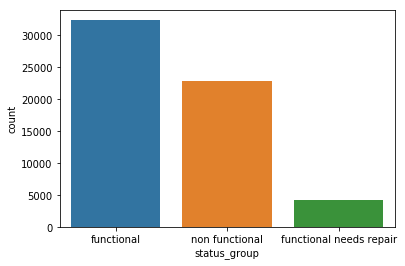

In [3]:
label=pd.read_csv('Label.csv')
sns.countplot(x='status_group',data=label)
y=label['status_group']

In [4]:
train=train.merge(label)


In [5]:
test=pd.read_csv('Test.csv')

In [6]:
test=test.reset_index(drop=True)
train_test=pd.concat([train,test])
train_test= train_test.reset_index(drop=True)
train_test.info()
train_test['date_recorded'] = pd.to_datetime(train_test.date_recorded)

C:\Users\Jaspal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 41 columns):
amount_tsh               74250 non-null float64
basin                    74250 non-null object
construction_year        74250 non-null int64
date_recorded            74250 non-null object
district_code            74250 non-null int64
extraction_type          74250 non-null object
extraction_type_class    74250 non-null object
extraction_type_group    74250 non-null object
funder                   69746 non-null object
gps_height               74250 non-null int64
id                       74250 non-null int64
installer                69718 non-null object
latitude                 74250 non-null float64
lga                      74250 non-null object
longitude                74250 non-null float64
management               74250 non-null object
management_group         74250 non-null object
num_private              74250 non-null int64
payment                  74250 non-null object


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [72]:
pd.set_option('display.max_columns', 50)

In [73]:
train=pd.concat([train,y])

In [128]:
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallo

In [28]:
train['waterpoint_type_group'].unique()

array(['communal standpipe', 'hand pump', 'other', 'improved spring',
       'cattle trough', 'dam', nan], dtype=object)

In [29]:
train['waterpoint_type'].unique()

array(['communal standpipe', 'communal standpipe multiple', 'hand pump',
       'other', 'improved spring', 'cattle trough', 'dam', nan],
      dtype=object)

In [57]:
train['management_group'].nunique()

5

In [ ]:
train.drop(['wpt_name','id','funder','installer','subvillage','recorded_by','scheme_name',],axis=1,inplace=True)

In [215]:
train=train.merge(label)

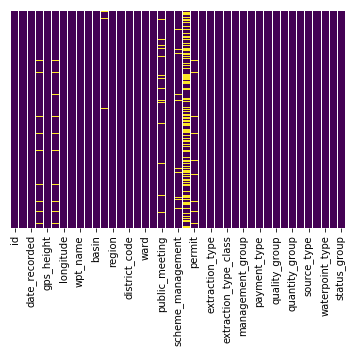

In [100]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [185]:
train=train.reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [216]:
test=pd.read_csv('Test.csv')

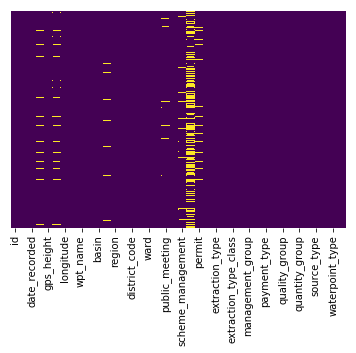

In [85]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [135]:
train.dropna(inplace=True)

In [7]:
#test.dropna(inplace=True)
test=test.reset_index(drop=True)
train_test=pd.concat([train,test])
train_test= train_test.reset_index(drop=True)
train_test.info()
train_test['date_recorded'] = pd.to_datetime(train_test.date_recorded)

C:\Users\Jaspal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 41 columns):
amount_tsh               74250 non-null float64
basin                    74250 non-null object
construction_year        74250 non-null int64
date_recorded            74250 non-null object
district_code            74250 non-null int64
extraction_type          74250 non-null object
extraction_type_class    74250 non-null object
extraction_type_group    74250 non-null object
funder                   69746 non-null object
gps_height               74250 non-null int64
id                       74250 non-null int64
installer                69718 non-null object
latitude                 74250 non-null float64
lga                      74250 non-null object
longitude                74250 non-null float64
management               74250 non-null object
management_group         74250 non-null object
num_private              74250 non-null int64
payment                  74250 non-null object


In [8]:
train_test.fillna('0',inplace=True)

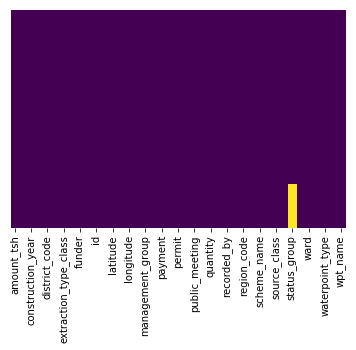

In [139]:
sns.heatmap(train_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [274]:
y=train_test['status_group']
train_test.drop('status_group',axis=1,inplace=True)

In [275]:
train_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 40 columns):
amount_tsh               74250 non-null float64
basin                    74250 non-null object
construction_year        74250 non-null int64
date_recorded            74250 non-null datetime64[ns]
district_code            74250 non-null int64
extraction_type          74250 non-null object
extraction_type_class    74250 non-null object
extraction_type_group    74250 non-null object
funder                   74250 non-null object
gps_height               74250 non-null int64
id                       74250 non-null int64
installer                74250 non-null object
latitude                 74250 non-null float64
lga                      74250 non-null object
longitude                74250 non-null float64
management               74250 non-null object
management_group         74250 non-null object
num_private              74250 non-null int64
payment                  74250 non-null

In [9]:
train_test.drop(['wpt_name','id','funder','installer','subvillage','recorded_by','scheme_name'],axis=1,inplace=True)

In [ ]:
pd.get_dummies(train_test)

In [278]:
train_test.columns

Index(['amount_tsh', 'basin', 'construction_year', 'date_recorded',
       'district_code', 'extraction_type', 'extraction_type_class',
       'extraction_type_group', 'gps_height', 'latitude', 'lga', 'longitude',
       'management', 'management_group', 'num_private', 'payment',
       'payment_type', 'permit', 'population', 'public_meeting',
       'quality_group', 'quantity', 'quantity_group', 'region', 'region_code',
       'scheme_management', 'source', 'source_class', 'source_type', 'ward',
       'water_quality', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [229]:
train_test

,amount_tsh,basin,construction_year,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,gps_height,latitude,lga,longitude,management,management_group,num_private,payment,payment_type,permit,population,public_meeting,quality_group,quantity,quantity_group,region,region_code,...,2013-03-28 00:00:00,2013-03-29 00:00:00,2013-03-30 00:00:00,2013-04-02 00:00:00,2013-04-03 00:00:00,2013-04-04 00:00:00,2013-05-02 00:00:00,2013-05-03 00:00:00,2013-05-04 00:00:00,2013-06-03 00:00:00,2013-06-04 00:00:00,2013-07-02 00:00:00,2013-07-03 00:00:00,2013-07-04 00:00:00,2013-08-02 00:00:00,2013-08-03 00:00:00,2013-09-02 00:00:00,2013-09-03 00:00:00,2013-10-02 00:00:00,2013-10-03 00:00:00,2013-11-02 00:00:00,2013-11-03 00:00:00,2013-12-01 00:00:00,2013-12-02 00:00:00,2013-12-03 00:00:00
0,6000.0,Lake Nyasa,1999,2011-03-14,5,gravity,gravity,gravity,1390,-9.856322e+00,Ludewa,34.938093,vwc,user-group,0,pay annually,annually,False,109,True,good,enough,enough,Iringa,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,Lake Victoria,2010,2013-03-06,2,gravity,gravity,gravity,1399,-2.147466e+00,Serengeti,34.698766,wug,user-group,0,never pay,never pay,True,280,0,good,insufficient,insufficient,Mara,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25.0,Pangani,2009,2013-02-25,4,gravity,gravity,gravity,686,-3.821329e+00,Simanjiro,37.460664,vwc,user-group,0,pay per bucket,per bucket,True,250,True,good,enough,enough,Manyara,21,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,Ruvuma / Southern Coast,1986,2013-01-28,63,submersible,submersible,submersible,263,-1.115530e+01,Nanyumbu,38.486161,vwc,user-group,0,never pay,never pay,True,58,True,good,dry,dry,Mtwara,90,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,Lake Victoria,0,2011-07-13,1,gravity,gravity,gravity,0,-1.825359e+00,Karagwe,31.130847,other,other,0,never pay,never pay,True,0,True,good,seasonal,seasonal,Kagera,18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,20.0,Pangani,2009,2011-03-13,8,submersible,submersible,submersible,0,-4.765587e+00,Mkinga,39.172796,vwc,user-group,0,pay per bucket,per bucket,True,1,True,salty,enough,enough,Tanga,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.0,Internal,0,2012-10-01,3,swn 80,handpump,swn 80,0,-3.766365e+00,Shinyanga Rural,33.362410,vwc,user-group,0,never pay,never pay,True,0,True,good,enough,enough,Shinyanga,17,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.0,Lake Tanganyika,0,2012-10-09,3,nira/tanira,handpump,nira/tanira,0,-4.226198e+00,Kahama,32.620617,wug,user-group,0,unknown,unknown,True,0,True,milky,enough,enough,Shinyanga,17,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.0,Lake Tanganyika,0,2012-11-03,6,india mark ii,handpump,india mark ii,0,-5.146712e+00,Tabora Urban,32.711100,vwc,user-group,0,never pay,never pay,True,0,True,salty,seasonal,seasonal,Tabora,14,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0.0,Lake Victoria,0,2011-08-03,1,nira/tanira,handpump,nira/tanira,0,-1.257051e+00,Karagwe,30.626991,vwc,user-group,0,never pay,never pay,True,0,True,good,enough,enough,Kagera,18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
train_test.drop(['basin','date_recorded','extraction_type', 'extraction_type_class',
       'extraction_type_group','lga','management', 'management_group','payment',
       'payment_type', 'permit','public_meeting',
       'quality_group', 'quantity', 'quantity_group', 'region','scheme_management', 'source', 'source_class', 'source_type', 'ward',
       'water_quality', 'waterpoint_type', 'waterpoint_type_group'],axis=1,inplace=True)

In [12]:
train_test = pd.concat([train_test,basin,extraction_type,extraction_type_class,
extraction_type_group,
lga,
management,
management_group,
payment,
payment_type,
permit,
public_meeting,
quality_group,
region,
scheme_management,
source,
source_class,
source_type,
ward,
water_quality,
waterpoint_type,
waterpoint_type_group],axis=1)

In [223]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Columns: 2768 entries, amount_tsh to 2013-12-03 00:00:00
dtypes: datetime64[ns](1), float64(3), int64(6), object(23), uint8(2735)
memory usage: 212.4+ MB


In [281]:
train=train_test.iloc[0:59400]
test=train_test.iloc[59400:]

In [253]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_sample(X, y)


In [254]:
new_X=pd.DataFrame(X_resample)
new_Y=pd.DataFrame(y_resample)
new_X.columns=X.columns
new_Y.columns=['status_group']

In [283]:
y=y.iloc[0:59400]

In [284]:
X=train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
#X_train, X_test, y_train, y_test = train_test_split(new_X,new_Y, test_size=0.30)

In [285]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [286]:
rfc.fit(X_train,y_train)
#rfc.feature_importances_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [287]:
rfc_pred = rfc.predict(X_test)

In [288]:
from sklearn.metrics import classification_report

print(classification_report(y_test,rfc_pred))

                         precision    recall  f1-score   support

             functional       0.79      0.84      0.81      9632
functional needs repair       0.47      0.36      0.41      1285
         non functional       0.79      0.74      0.76      6903

              micro avg       0.77      0.77      0.77     17820
              macro avg       0.68      0.65      0.66     17820
           weighted avg       0.76      0.77      0.76     17820



In [259]:
pred=rfc.predict(test)

In [260]:
submission=pd.read_csv('test.csv')

In [261]:
submission.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [262]:
submission.fillna('0',inplace=True)
submission.drop(['amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],axis=1,inplace=True)

In [263]:
pred

array(['functional', 'functional needs repair', 'functional', ...,
       'functional', 'non functional', 'non functional'], dtype=object)

In [264]:
submission['status_group'] = pred

In [265]:
submission

,id,status_group
0,50785,functional
1,51630,functional needs repair
2,17168,functional
3,45559,non functional
4,49871,functional
5,52449,functional
6,24806,functional
7,28965,non functional
8,36301,non functional
9,54122,functional


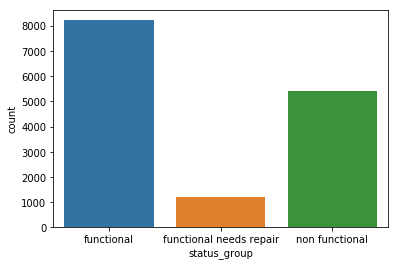

In [266]:
sns.countplot(x='status_group',data=submission)


In [267]:
submission.to_csv("Submission2.csv", encoding='utf-8', index=False)

In [289]:
from sklearn.base import clone 

def drop_col_feat_imp(rfc, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(rfc)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(rfc)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [ ]:
drop_col_feat_imp(rfc, X_train, y_train, random_state = 42)

In [291]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [292]:
feature_importances

,importance
latitude,1.354501e-01
longitude,1.340535e-01
gps_height,6.555487e-02
population,4.593749e-02
construction_year,4.435090e-02
amount_tsh,1.975020e-02
other,1.905663e-02
district_code,1.428010e-02
other,1.130561e-02
region_code,1.120784e-02
